In [1]:
print('hello world')

hello world


In [2]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
df=pd.read_csv("spam.csv", encoding = "ISO-8859-1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3884,ham,Like a personal sized or what,NaN,NaN,NaN
2907,ham,Why must we sit around and wait for summer day...,NaN,NaN,NaN
2535,ham,Can you pls pls send me a mail on all you know...,NaN,NaN,NaN
2279,ham,"Sorry, I'll call later in meeting",NaN,NaN,NaN
270,ham,"Come to mu, we're sorting out our narcotics si...",NaN,NaN,NaN
5167,ham,Oh did you charge camera,NaN,NaN,NaN
480,ham,"Almost there, see u in a sec",NaN,NaN,NaN
3289,ham,My tuition is at 330. Hm we go for the 1120 to...,NaN,NaN,NaN
3628,ham,Should I head straight there or what,NaN,NaN,NaN
5521,ham,You are a big chic. Common. Declare,NaN,NaN,NaN


In [9]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [10]:
df['Unnamed: 4'].value_counts()

GNT:-)"                                                     2
 Never comfort me with a lie\" gud ni8 and sweet dreams"    1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
 one day these two will become FREINDS FOREVER!"            1
 just Keep-in-touch\" gdeve.."                              1
Name: Unnamed: 4, dtype: int64

-Project Steps
1. Data Cleaning
2. EDA
3. Test Preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Website
8. Deployment

Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
#removing the unnamed columns as there are mostly Nan Value.
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [12]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
#Renameing the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [14]:
df.sample(5)

,target,text
1662,spam,Hi if ur lookin 4 saucy daytime fun wiv busty ...
3912,ham,Yeah whatever lol
1683,ham,Already am squatting is the new way of walking
988,ham,Yun ah.the ubi one say if Ì_ wan call by tomor...
1264,ham,I will see in half an hour


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
df['target']=encoder.fit_transform(df['target'])
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

In [17]:
#Always check null values
df.isnull().sum() 

target    0
text      0
dtype: int64

In [18]:
#Always Check duplicate values
df.duplicated().sum()

403

In [19]:
df=df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


EDA
1. How many % Spam and ham messages are there
2. Develop new feature and analyse it wheather they are useful or not

In [22]:
print('total percentage on ham messages \n',(df['target']==0).sum()*100/(df['target'].count()))
print()
print('total percentage on spam messages \n',(df['target']==1).sum()*100/(df['target'].count()))
#

total percentage on ham messages 
 87.3669955503966

total percentage on spam messages 
 12.633004449603405


In [23]:
#lets make pie chart
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

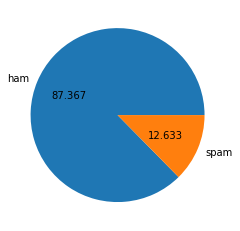

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct="%0.3f")
plt.show()

- Imbalanced data set

In [25]:
#Lets do text data analysis
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
#No of character
def char(column):
    a=0
    for i in column.split():
        a=a+len(i)
    return a

In [29]:
pd.options.mode.chained_assignment = None

In [30]:
df['cha_length']=df['text'].apply(char)

In [31]:
df.sample(5)

,target,text,cha_length
1581,0,Hhahhaahahah rofl wtf nig was leonardo in your...,54
226,1,Will u meet ur dream partner soon? Is ur caree...,108
1049,1,18 days to Euro2004 kickoff! U will be kept in...,111
760,1,"Romantic Paris. 2 nights, 2 flights from å£79 ...",81
302,0,Oh and by the way you do have more food in you...,70


In [32]:
# No of words

def word_num(column):    #He re us can use nltk.tokenize func but it gives different values so be careful befor using it
  l=[]
  for i in column.split():
    l.append(i)
  return len(l)

df['word_num']=df['text'].apply(word_num)

df.sample(5)

,target,text,cha_length,word_num
4773,0,U repeat e instructions again. Wat's e road na...,50,12
1516,0,I need to come home and give you some good lov...,41,11
4794,0,Saw Guys and Dolls last night with Patrick Swa...,51,12
237,0,Where are you?when wil you reach here?,32,7
523,0,"That's very rude, you on campus?",27,6


In [33]:
#No of sentence, Here we use sentence tokenize from nltk

df['len_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head(2)


,target,text,cha_length,word_num,len_sentence
0,0,"Go until jurong point, crazy.. Available only ...",92,20,2
1,0,Ok lar... Joking wif u oni...,24,6,2


In [34]:
df.rename(columns={'cha_length':'num_characters','word_num':'num_words', 'len_sentence':'num_sentences'}, inplace=True)

In [35]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",92,20,2
1,0,Ok lar... Joking wif u oni...,24,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,128,28,2
3,0,U dun say so early hor... U c already then say...,39,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",49,13,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,132,30,4
5568,0,Will Ì_ b going to esplanade fr home?,30,8,1
5569,0,"Pity, * was in mood for that. So...any other s...",48,10,2
5570,0,The guy did some bitching but I acted like i'd...,100,26,1


In [36]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,64.521571,15.340685,1.961308
std,47.426719,11.068488,1.432583
min,2.000000,1.000000,1.000000
25%,29.000000,7.000000,1.000000
50%,49.000000,12.000000,1.000000
75%,95.000000,22.000000,2.000000
max,740.000000,171.000000,38.000000


In [37]:
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,57.199070,14.134632,1.815545
std,45.374978,11.116240,1.364098
min,2.000000,1.000000,1.000000
25%,28.000000,7.000000,1.000000
50%,43.000000,11.000000,1.000000
75%,73.000000,18.000000,2.000000
max,740.000000,171.000000,38.000000


In [38]:
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,115.162328,23.681470,2.969372
std,25.128956,5.967672,1.488910
min,12.000000,2.000000,1.000000
25%,109.000000,22.000000,2.000000
50%,123.000000,25.000000,3.000000
75%,131.000000,28.000000,4.000000
max,191.000000,35.000000,9.000000


In [39]:
#lets check data visulization using graph
import seaborn as sns

Text(0, 0.5, 'frequency')

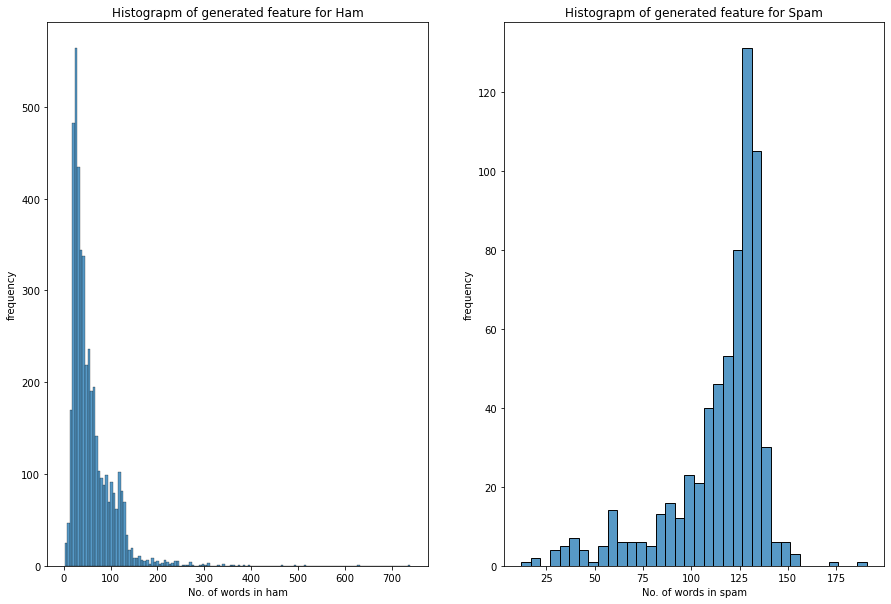

In [40]:
from IPython.core.pylabtools import figsize
plt.figure(figsize=(15,10))


plt.subplot(1,2,1)
sns.histplot(df[df['target']==0]['num_characters'])
plt.title('Histograpm of generated feature for Ham')
plt.xlabel('No. of words in ham')
plt.ylabel('frequency')

plt.subplot(1,2,2)
sns.histplot(df[df['target']==1]['num_characters'])
plt.title('Histograpm of generated feature for Spam')
plt.xlabel('No. of words in spam')
plt.ylabel('frequency')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_characters', ylabel='Density'>

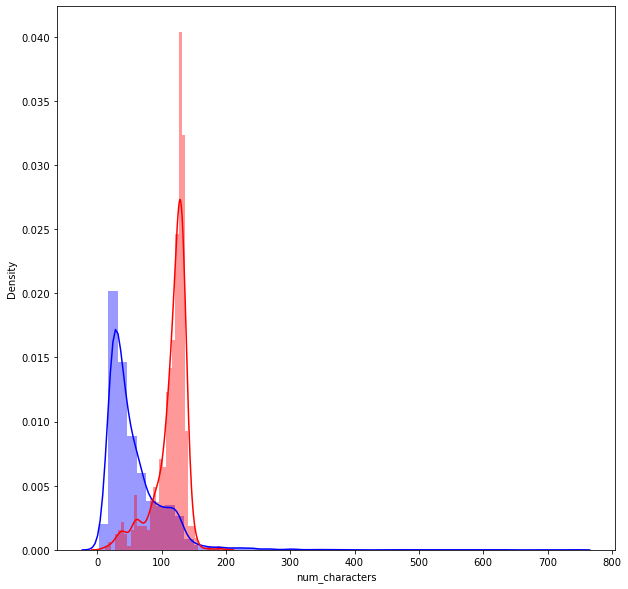

In [41]:
#How indivisul columns helps to seperate my class - Univariant Analysis
plt.figure(figsize=(10,10))

sns.distplot(df[df['target']==0]['num_characters'], label='0', color='blue')
sns.distplot(df[df['target']==1]['num_characters'], label='1', color='red')

-Feature are very helpful in seperating the class

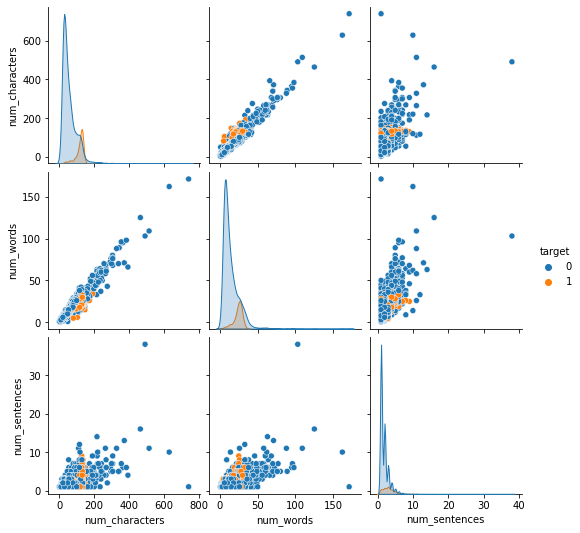

In [42]:
#lets check the relationship between the features - Biavariant analysis

sns.pairplot(df, hue='target')

<AxesSubplot:>

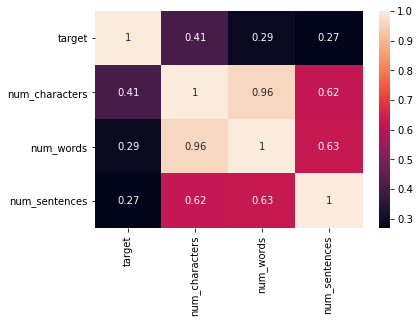

In [43]:
sns.heatmap(df.corr(), annot=True)  #Annot=Annotation

- Here we can only keep one feature as there are very much correlation coefficient. We keep character feature as it has good relation with target than others

Data Preprocessing
1. Lower case
2. tokenization
3. removing special character
4. removing stop words and punchuation
5. stemming

In [44]:
import nltk    #imp for stowords 
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

import string  #imp package for punchuation mark
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [54]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y
    a=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            a.append(i)
    b=[]
    for i in a:
        b.append(ps.stem(i))
    return " ".join(b)  


In [55]:
df['transformed_text']=df['text'].apply(transform_text)

In [57]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\admin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [58]:
#Creating word cloud
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [59]:
#create word cloud object

spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

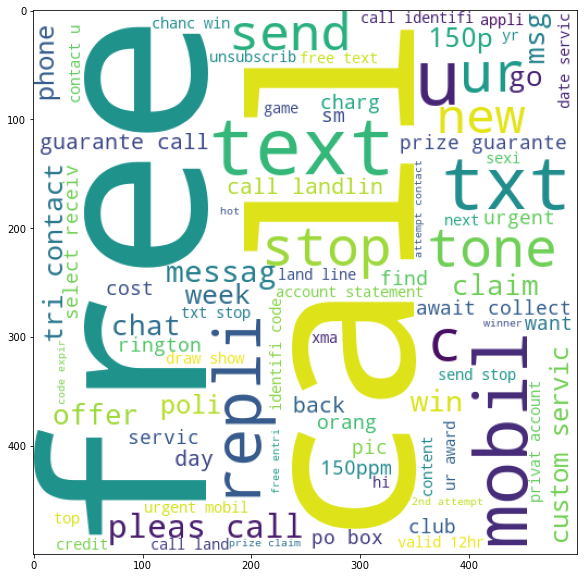

In [60]:
plt.figure(figsize=(15,10))
plt.imshow(spam_wc)

In [61]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

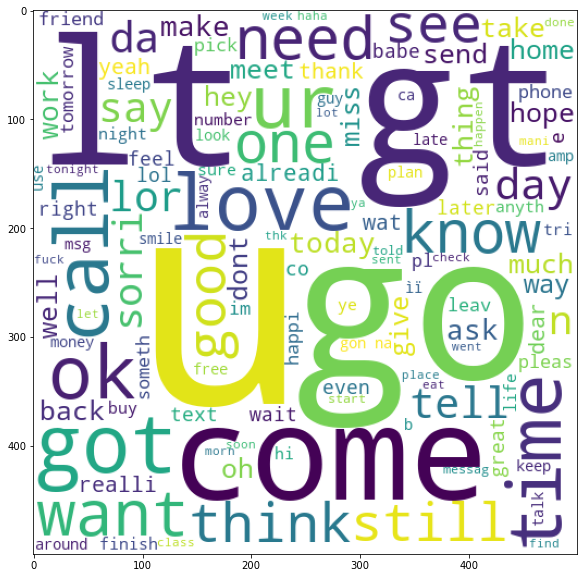

In [62]:
plt.figure(figsize=(15,10))
plt.imshow(ham_wc)

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",92,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,24,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,128,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,39,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",49,13,1,nah think goe usf live around though


In [64]:
a=[]
count=0
for i in df['transformed_text']:
    for j in i.split():
        if j not in a:
            count=count+1
            a.append(j)

In [65]:
 #Second code
spam_corpus=[] 
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [66]:
len(spam_corpus)

9939

In [67]:
from collections import Counter
Counter(spam_corpus).most_common(30)   #create dictionary with counts

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [68]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


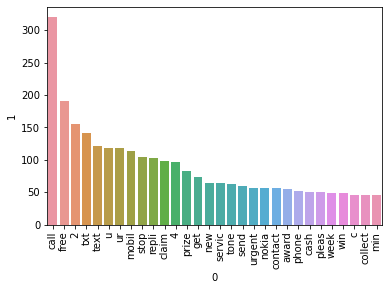

In [69]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1]) 
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [71]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
X.shape

(5169, 6708)

In [73]:
y=df['target'].values

In [74]:
from sklearn.model_selection import train_test_split 

In [75]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [76]:
#Calling algorithm
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [77]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [78]:
#here we look for Precision not accuracy

gnb.fit(x_train,y_train)
y_predict=gnb.predict(x_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))


0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [79]:
mnb.fit(x_train,y_train)
y_predict=mnb.predict(x_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))
#improve very much by using tfidf from 97 to 100 percent

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [80]:
bnb.fit(x_train,y_train)
y_predict=bnb.predict(x_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [81]:
import pickle

In [83]:
with open('mnb_pkl', 'wb') as files:
    pickle.dump(mnb, files)

In [84]:
with open('mnb_pkl' , 'rb') as f:
    lr = pickle.load(f)

In [85]:
lr.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Model Improvement
#max(3000)feature in tfidf
#Scaling
#Voting classifier